In [129]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [130]:
feature_names = list(X_train_scaled.columns)

print("Train shape:", X_train_scaled.shape, " | Test shape:", X_test_scaled.shape)
print("Target balance (train):")
print(pd.Series(y_train_sm).value_counts())

Train shape: (179250, 33)  | Test shape: (29694, 33)
Target balance (train):
Status
1    89625
0    89625
Name: count, dtype: int64


In [131]:
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sm.columns)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [132]:
feature_names = X_train_scaled.columns.tolist()


In [133]:
rf = RandomForestClassifier(
    n_estimators=500, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_train_scaled, y_train_sm)


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [134]:
imp_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)


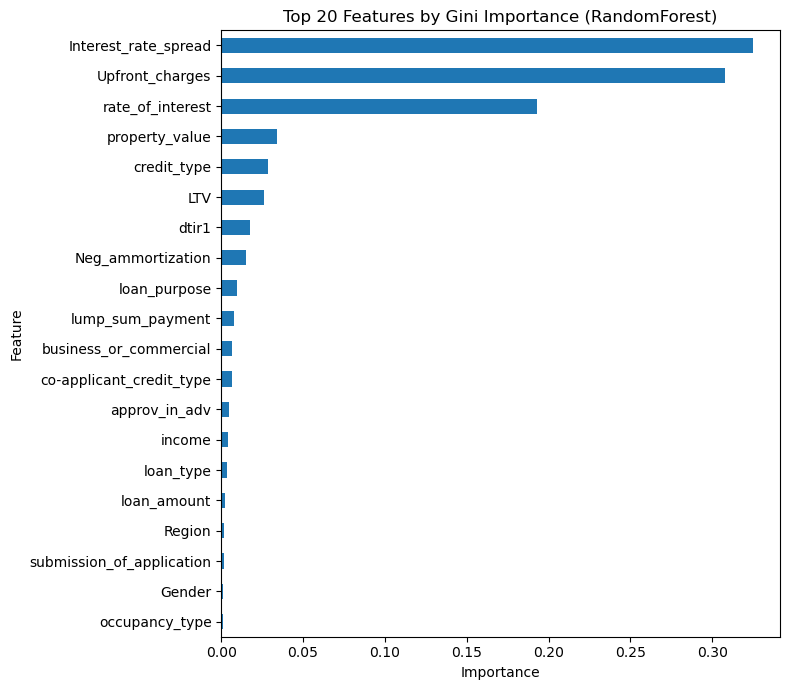

In [135]:
top_n = 20 
plt.figure(figsize=(8, max(4, top_n*0.35)))
imp_rf.head(top_n)[::-1].plot(kind="barh")
plt.title(f"Top {top_n} Features by Gini Importance (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()